# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [2]:
!pip install pymongo

     |████████████████████████████████| 509 kB 14.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 12.0 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 147 kB 23.3 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [1]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [2]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [3]:
client = MongoClient(mongod_connect)
db = client.gp1 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [22]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [23]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1349462091925647360
1349462092278063105
1349462092546502656
1349462092852719620
1349462093443989505
1349462093704163329
1349462094026924034
1349462093750218758
1349462093808893955
1349462094119391233
1349462094140346368
1349462094404493312
1349462094526238728
1349462094928900097
1349462095285387266
1349462095503515650
1349462096438841345
1349462097252528129
1349462098053648384
1349462098116571137
1349462098577915906
1349462098053623808
1349462099135750146
1349462099882201092
1349462099907530754
1349462100142411779
1349462100402466817
1349462100167553024
1349462100566007808
1349462101690085378
1349462102319063041
1349462102738657281
1349462102856118278
1349462102931623937
1349462103715848192
1349462103887912963
1349462103934046211
1349462104068087808
1349462104114421761
1349462104307339266
1349462104567402497
1349462105708236801
1349462106874245123
1349462106756829188
1349462107377438722
1349462107604004865
1349462108757516290
1349462108874956802
1349462108858150913
1349462108853862400


1349462266429763585
1349462266362667015
1349462267709059072
1349462267025362951
1349462269718110214
1349462269776834560
1349462270213042176
1349462269948817409
1349462270229753860
1349462270401777672
1349462270674411522
1349462271282569217
1349462271408418816
1349462271542620163
1349462271525793792
1349462271878193153
1349462271869808641
1349462271936884736
1349462272742219776
1349462271311884289
1349462273199366147
1349462273757241347
1349462273862098945
1349462274583515140
1349462275581734920
1349462275862765569
1349462276110217228
1349462276206710784
1349462276483510275
1349462276634415104
1349462277007822849
1349462277339156481
1349462277255098368
1349462279327162369
1349462279310471170
1349462279360831493
1349462280405217284
1349462280556183552
1349462280560390145
1349462281063641097
1349462281147609088
1349462281919188993
1349462282128945152
1349462282225528843
1349462282539962369
1349462282858741762
1349462282837909505
1349462283131510789
1349462284091985925
1349462284473663496


1349462440514351105
1349462440480821249
1349462441256738823
1349462441701351426
1349462442829623296
1349462443060301825
1349462442888159232
1349462443504922625
1349462443697827847
1349462444117282817
1349462444368949250
1349462444834508805
1349462445107146758
1349462445123903490
1349462445031624712
1349462446151528450
1349462446583521284
1349462446977781775
1349462447334318081
1349462448319975426
1349462448705839109
1349462449544687617
1349462449527906306
1349462449926373378
1349462450656182274
1349462451952226309
1349462451788648449
1349462452388421634
1349462452556148738
1349462453139206148
1349462453072101383
1349462454028402690
1349462454259036162
1349462454452031490
1349462454875643905
1349462454976315392
1349462455085359105
1349462455928430596
1349462456263979008
1349462456171692033
1349462456314302464
1349462457379680258
1349462457790701568
1349462459116118017
1349462459552210945
1349462459795402754
1349462460604899330
1349462460810539009
1349462460806426627
1349462461259403271


1349462611742613511
1349462612824772609
1349462613579735041
1349462613671899137
1349462615613984768
1349462615643344896
1349462615718768640
1349462615530074115
1349462615790120960
1349462615781761027
1349462615735627777
1349462616075362320
1349462616331218949
1349462616452837377
1349462616796766210
1349462616847093761
1349462617438494721
1349462618445017088
1349462617564340224
1349462618629541890
1349462618281541634
1349462619883778049
1349462620017991680
1349462620307386369
1349462621108527105
1349462621238530053
1349462621376929799
1349462621276282886
1349462621699919872
1349462622815531010
1349462622861721601
1349462622933032961
1349462623075627008
1349462623155326976
1349462623474110464
1349462623679606787
1349462623885135877
1349462623205675011
1349462624224882688
1349462624363155456
1349462624598155265
1349462626582081538
1349462626468847617
1349462626791813120
1349462626884071424
1349462627127349252
1349462627496284160
1349462627198623748
1349462627555155973
1349462627160911885


## Use the REST API to Collect Tweets

Authorize the REST API 

In [ ]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [ ]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=17968576012824731733&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1610571296&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=%2B2KBaz1w7WIUrvnlUxWM5taAnGE%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [10]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                       max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:33 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:32 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:31 +0000 2021'
'Wed Jan 13 20:48:30 +0000 2021'
'Wed Jan 13 20:48:30 +0000 2021'
'Wed Jan 13 20:48:30 +0000 2021'
'Wed Jan 13 20:48:30 +0000 2021'
'Wed Jan 13 20:48:30 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:48:00 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:59 +0000 2021'
'Wed Jan 13 20:47:58 +0000 2021'
'Wed Jan 13 20:47:58 +0000 2021'
'Wed Jan 13 20:47:58 +0000 2021'
'Wed Jan 13 20:47:58 +0000 2021'
'Wed Jan 13 20:47:58 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:57 +0000 2021'
'Wed Jan 13 20:47:56 +0000 2021'
'Wed Jan 13 20:47:56 +0000 2021'
'Wed Jan 13 20:47:56 +0000 2021'
'Wed Jan 13 20:47:56 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:47:19 +0000 2021'
'Wed Jan 13 20:47:19 +0000 2021'
'Wed Jan 13 20:47:18 +0000 2021'
'Wed Jan 13 20:47:18 +0000 2021'
'Wed Jan 13 20:47:18 +0000 2021'
'Wed Jan 13 20:47:18 +0000 2021'
'Wed Jan 13 20:47:18 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:17 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:16 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:15 +0000 2021'
'Wed Jan 13 20:47:14 +0000 2021'
'Wed Jan 13 20:47:14 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:46:10 +0000 2021'
'Wed Jan 13 20:46:10 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:09 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:08 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 13 20:46:07 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:32 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:31 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:30 +0000 2021'
'Wed Jan 13 20:45:29 +0000 2021'
'Wed Jan 13 20:45:29 +0000 2021'
'Wed Jan 13 20:45:29 +0000 2021'
'Wed Jan 13 20:45:29 +0000 2021'
'Wed Jan 13 20:45:29 +0000 2021'
'Wed Jan 13 20:45:28 +0000 2021'
'Wed Jan 13 20:45:28 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:45:01 +0000 2021'
'Wed Jan 13 20:45:01 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:45:00 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 13 20:44:59 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:22 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:21 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:20 +0000 2021'
'Wed Jan 13 20:44:19 +0000 2021'
'Wed Jan 13 20:44:19 +0000 2021'
'Wed Jan 13 20:44:19 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:44 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:43 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:42 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:41 +0000 2021'
'Wed Jan 13 20:43:40 +0000 2021'
'Wed Jan 13 20:43:40 +0000 2021'
'Wed Jan 13 20:43:40 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:07 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:06 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:05 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 13 20:43:04 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:42:31 +0000 2021'
'Wed Jan 13 20:42:31 +0000 2021'
'Wed Jan 13 20:42:31 +0000 2021'
'Wed Jan 13 20:42:31 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:30 +0000 2021'
'Wed Jan 13 20:42:29 +0000 2021'
'Wed Jan 13 20:42:29 +0000 2021'
'Wed Jan 13 20:42:29 +0000 2021'
'Wed Jan 13 20:42:28 +0000 2021'
'Wed Jan 13 20:42:28 +0000 2021'
'Wed Jan 13 20:42:28 +0000 2021'
'Wed Jan 13 20:42:28 +0000 2021'
'Wed Jan 13 20:42:27 +0000 2021'
'Wed Jan 13 20:42:27 +0000 2021'
'Wed Jan 13 20:42:27 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:26 +0000 2021'
'Wed Jan 13 20:42:25 +0000 2021'
'Wed Jan 13 20:42:25 +0000 2021'
'Wed Jan 13 20:42:25 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:41:48 +0000 2021'
'Wed Jan 13 20:41:48 +0000 2021'
'Wed Jan 13 20:41:48 +0000 2021'
'Wed Jan 13 20:41:48 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:47 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:46 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 13 20:41:45 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:41:13 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:12 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:11 +0000 2021'
'Wed Jan 13 20:41:10 +0000 2021'
'Wed Jan 13 20:41:10 +0000 2021'
'Wed Jan 13 20:41:10 +0000 2021'
'Wed Jan 13 20:41:10 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 13 20:41:09 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:40:35 +0000 2021'
'Wed Jan 13 20:40:35 +0000 2021'
'Wed Jan 13 20:40:34 +0000 2021'
'Wed Jan 13 20:40:34 +0000 2021'
'Wed Jan 13 20:40:34 +0000 2021'
'Wed Jan 13 20:40:33 +0000 2021'
'Wed Jan 13 20:40:33 +0000 2021'
'Wed Jan 13 20:40:33 +0000 2021'
'Wed Jan 13 20:40:33 +0000 2021'
'Wed Jan 13 20:40:33 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:32 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:31 +0000 2021'
'Wed Jan 13 20:40:30 +0000 2021'
'Wed Jan 13 20:40:30 +0000 2021'
'Wed Jan 13 20:40:30 +0000 2021'
'Wed Jan 13 20:40:30 +0000 2021'
'Wed Jan 13 20:40:30 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:40:00 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:59 +0000 2021'
'Wed Jan 13 20:39:58 +0000 2021'
'Wed Jan 13 20:39:58 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:39:25 +0000 2021'
'Wed Jan 13 20:39:24 +0000 2021'
'Wed Jan 13 20:39:24 +0000 2021'
'Wed Jan 13 20:39:24 +0000 2021'
'Wed Jan 13 20:39:24 +0000 2021'
'Wed Jan 13 20:39:24 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:23 +0000 2021'
'Wed Jan 13 20:39:22 +0000 2021'
'Wed Jan 13 20:39:22 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:21 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 13 20:39:20 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:44 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:43 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:42 +0000 2021'
'Wed Jan 13 20:38:41 +0000 2021'
'Wed Jan 13 20:38:41 +0000 2021'
'Wed Jan 13 20:38:41 +0000 2021'
'Wed Jan 13 20:38:41 +0000 2021'
'Wed Jan 13 20:38:41 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:38:04 +0000 2021'
'Wed Jan 13 20:38:04 +0000 2021'
'Wed Jan 13 20:38:03 +0000 2021'
'Wed Jan 13 20:38:03 +0000 2021'
'Wed Jan 13 20:38:03 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:02 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:01 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 13 20:38:00 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:37:24 +0000 2021'
'Wed Jan 13 20:37:23 +0000 2021'
'Wed Jan 13 20:37:23 +0000 2021'
'Wed Jan 13 20:37:23 +0000 2021'
'Wed Jan 13 20:37:23 +0000 2021'
'Wed Jan 13 20:37:23 +0000 2021'
'Wed Jan 13 20:37:22 +0000 2021'
'Wed Jan 13 20:37:22 +0000 2021'
'Wed Jan 13 20:37:22 +0000 2021'
'Wed Jan 13 20:37:22 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:21 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:20 +0000 2021'
'Wed Jan 13 20:37:19 +0000 2021'
'Wed Jan 13 20:37:19 +0000 2021'
'Wed Jan 13 20:37:19 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:36:34 +0000 2021'
'Wed Jan 13 20:36:34 +0000 2021'
'Wed Jan 13 20:36:34 +0000 2021'
'Wed Jan 13 20:36:34 +0000 2021'
'Wed Jan 13 20:36:33 +0000 2021'
'Wed Jan 13 20:36:33 +0000 2021'
'Wed Jan 13 20:36:33 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:32 +0000 2021'
'Wed Jan 13 20:36:31 +0000 2021'
'Wed Jan 13 20:36:31 +0000 2021'
'Wed Jan 13 20:36:31 +0000 2021'
'Wed Jan 13 20:36:31 +0000 2021'
'Wed Jan 13 20:36:31 +0000 2021'
'Wed Jan 13 20:36:30 +0000 2021'
'Wed Jan 13 20:36:30 +0000 2021'
'Wed Jan 13 20:36:30 +0000 2021'
'Wed Jan 13 20:36:30 +0000 2021'
'Wed Jan 13 20:36:29 +0000 2021'
'Wed Jan 13 20:36:29 +0000 2021'
'Wed Jan 13 20:36:29 +0000 2021'
'Wed Jan 13 20:36:29 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:35:55 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:54 +0000 2021'
'Wed Jan 13 20:35:53 +0000 2021'
'Wed Jan 13 20:35:53 +0000 2021'
'Wed Jan 13 20:35:53 +0000 2021'
'Wed Jan 13 20:35:53 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:52 +0000 2021'
'Wed Jan 13 20:35:51 +0000 2021'
'Wed Jan 13 20:35:51 +0000 2021'
'Wed Jan 13 20:35:50 +0000 2021'
'Wed Jan 13 20:35:50 +0000 2021'
'Wed Jan 13 20:35:50 +0000 2021'
'Wed Jan 13 20:35:50 +0000 2021'
'Wed Jan 13 20:35:49 +0000 2021'
'Wed Jan 13 20:35:49 +0000 2021'
'Wed Jan 13 20:35:49 +0000 2021'
'Wed Jan 13 20:35:49 +0000 2021'
'Wed Jan 13 20:35:48 +0000 2021'
'Wed Jan 13 20:35:48 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:11 +0000 2021'
'Wed Jan 13 20:35:10 +0000 2021'
'Wed Jan 13 20:35:10 +0000 2021'
'Wed Jan 13 20:35:10 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:09 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:08 +0000 2021'
'Wed Jan 13 20:35:07 +0000 2021'
'Wed Jan 13 20:35:07 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:34:35 +0000 2021'
'Wed Jan 13 20:34:35 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:34 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:33 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:32 +0000 2021'
'Wed Jan 13 20:34:31 +0000 2021'
'Wed Jan 13 20:34:31 +0000 2021'
'Wed Jan 13 20:34:31 +0000 2021'
'Wed Jan 13 20:34:31 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:33:55 +0000 2021'
'Wed Jan 13 20:33:54 +0000 2021'
'Wed Jan 13 20:33:54 +0000 2021'
'Wed Jan 13 20:33:54 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:53 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:52 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:51 +0000 2021'
'Wed Jan 13 20:33:50 +0000 2021'
'Wed Jan 13 20:33:49 +0000 2021'
'Wed Jan 13 20:33:49 +0000 2021'
'Wed Jan 13 20:33:49 +0000 2021'
'Wed Jan 13 20:33:49 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:09 +0000 2021'
'Wed Jan 13 20:33:08 +0000 2021'
'Wed Jan 13 20:33:08 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:07 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:06 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:05 +0000 2021'
'Wed Jan 13 20:33:04 +0000 2021'
'Wed Jan 13 20:33:04 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:32:28 +0000 2021'
'Wed Jan 13 20:32:28 +0000 2021'
'Wed Jan 13 20:32:28 +0000 2021'
'Wed Jan 13 20:32:28 +0000 2021'
'Wed Jan 13 20:32:27 +0000 2021'
'Wed Jan 13 20:32:27 +0000 2021'
'Wed Jan 13 20:32:27 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:26 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:25 +0000 2021'
'Wed Jan 13 20:32:24 +0000 2021'
'Wed Jan 13 20:32:24 +0000 2021'
'Wed Jan 13 20:32:24 +0000 2021'
'Wed Jan 13 20:32:24 +0000 2021'
'Wed Jan 13 20:32:24 +0000 2021'
'Wed Jan 13 20:32:23 +0000 2021'
'Wed Jan 13 20:32:23 +0000 2021'
'Wed Jan 13 20:32:23 +0000 2021'
'Wed Jan 13 20:32:23 +0000 2021'
'Wed Jan 13 20:32:22 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:31:44 +0000 2021'
'Wed Jan 13 20:31:44 +0000 2021'
'Wed Jan 13 20:31:44 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:43 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:42 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:41 +0000 2021'
'Wed Jan 13 20:31:40 +0000 2021'
'Wed Jan 13 20:31:40 +0000 2021'
'Wed Jan 13 20:31:40 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:31:00 +0000 2021'
'Wed Jan 13 20:31:00 +0000 2021'
'Wed Jan 13 20:30:59 +0000 2021'
'Wed Jan 13 20:30:59 +0000 2021'
'Wed Jan 13 20:30:59 +0000 2021'
'Wed Jan 13 20:30:59 +0000 2021'
'Wed Jan 13 20:30:59 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:58 +0000 2021'
'Wed Jan 13 20:30:57 +0000 2021'
'Wed Jan 13 20:30:57 +0000 2021'
'Wed Jan 13 20:30:57 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:56 +0000 2021'
'Wed Jan 13 20:30:55 +0000 2021'
'Wed Jan 13 20:30:55 +0000 2021'
'Wed Jan 13 20:30:55 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:13 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:12 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:11 +0000 2021'
'Wed Jan 13 20:30:10 +0000 2021'
'Wed Jan 13 20:30:10 +0000 2021'
'Wed Jan 13 20:30:10 +0000 2021'
'Wed Jan 13 20:30:09 +0000 2021'
'Wed Jan 13 20:30:09 +0000 2021'
'Wed Jan 13 20:30:09 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:29:38 +0000 2021'
'Wed Jan 13 20:29:38 +0000 2021'
'Wed Jan 13 20:29:38 +0000 2021'
'Wed Jan 13 20:29:38 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:37 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:36 +0000 2021'
'Wed Jan 13 20:29:35 +0000 2021'
'Wed Jan 13 20:29:35 +0000 2021'
'Wed Jan 13 20:29:35 +0000 2021'
'Wed Jan 13 20:29:34 +0000 2021'
'Wed Jan 13 20:29:34 +0000 2021'
'Wed Jan 13 20:29:34 +0000 2021'
'Wed Jan 13 20:29:34 +0000 2021'
'Wed Jan 13 20:29:33 +0000 2021'
'Wed Jan 13 20:29:33 +0000 2021'
'Wed Jan 13 20:29:33 +0000 2021'
'Wed Jan 13 20:29:32 +0000 2021'
'Wed Jan 13 20:29:32 +0000 2021'
'Wed Jan 13 20:29:32 +0000 2021'
'Wed Jan 13 20:29:32 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:28:55 +0000 2021'
'Wed Jan 13 20:28:55 +0000 2021'
'Wed Jan 13 20:28:55 +0000 2021'
'Wed Jan 13 20:28:55 +0000 2021'
'Wed Jan 13 20:28:55 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:54 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:53 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 13 20:28:52 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:28:13 +0000 2021'
'Wed Jan 13 20:28:13 +0000 2021'
'Wed Jan 13 20:28:12 +0000 2021'
'Wed Jan 13 20:28:12 +0000 2021'
'Wed Jan 13 20:28:12 +0000 2021'
'Wed Jan 13 20:28:12 +0000 2021'
'Wed Jan 13 20:28:12 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:11 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:10 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:09 +0000 2021'
'Wed Jan 13 20:28:08 +0000 2021'
'Wed Jan 13 20:28:08 +0000 2021'
'Wed Jan 13 20:28:08 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:27:31 +0000 2021'
'Wed Jan 13 20:27:31 +0000 2021'
'Wed Jan 13 20:27:31 +0000 2021'
'Wed Jan 13 20:27:31 +0000 2021'
'Wed Jan 13 20:27:31 +0000 2021'
'Wed Jan 13 20:27:30 +0000 2021'
'Wed Jan 13 20:27:30 +0000 2021'
'Wed Jan 13 20:27:30 +0000 2021'
'Wed Jan 13 20:27:29 +0000 2021'
'Wed Jan 13 20:27:29 +0000 2021'
'Wed Jan 13 20:27:29 +0000 2021'
'Wed Jan 13 20:27:28 +0000 2021'
'Wed Jan 13 20:27:28 +0000 2021'
'Wed Jan 13 20:27:28 +0000 2021'
'Wed Jan 13 20:27:28 +0000 2021'
'Wed Jan 13 20:27:28 +0000 2021'
'Wed Jan 13 20:27:27 +0000 2021'
'Wed Jan 13 20:27:27 +0000 2021'
'Wed Jan 13 20:27:27 +0000 2021'
'Wed Jan 13 20:27:27 +0000 2021'
'Wed Jan 13 20:27:27 +0000 2021'
'Wed Jan 13 20:27:26 +0000 2021'
'Wed Jan 13 20:27:26 +0000 2021'
'Wed Jan 13 20:27:26 +0000 2021'
'Wed Jan 13 20:27:26 +0000 2021'
'Wed Jan 13 20:27:26 +0000 2021'
'Wed Jan 13 20:27:25 +0000 2021'
'Wed Jan 13 20:27:25 +0000 2021'
'Wed Jan 13 20:27:25 +0000 2021'
'Wed Jan 13 20:27:25 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:26:49 +0000 2021'
'Wed Jan 13 20:26:49 +0000 2021'
'Wed Jan 13 20:26:48 +0000 2021'
'Wed Jan 13 20:26:48 +0000 2021'
'Wed Jan 13 20:26:48 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:47 +0000 2021'
'Wed Jan 13 20:26:46 +0000 2021'
'Wed Jan 13 20:26:46 +0000 2021'
'Wed Jan 13 20:26:46 +0000 2021'
'Wed Jan 13 20:26:46 +0000 2021'
'Wed Jan 13 20:26:46 +0000 2021'
'Wed Jan 13 20:26:45 +0000 2021'
'Wed Jan 13 20:26:45 +0000 2021'
'Wed Jan 13 20:26:45 +0000 2021'
'Wed Jan 13 20:26:45 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:44 +0000 2021'
'Wed Jan 13 20:26:43 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:26:07 +0000 2021'
'Wed Jan 13 20:26:07 +0000 2021'
'Wed Jan 13 20:26:07 +0000 2021'
'Wed Jan 13 20:26:07 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:06 +0000 2021'
'Wed Jan 13 20:26:05 +0000 2021'
'Wed Jan 13 20:26:05 +0000 2021'
'Wed Jan 13 20:26:05 +0000 2021'
'Wed Jan 13 20:26:05 +0000 2021'
'Wed Jan 13 20:26:05 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:04 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 13 20:26:03 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:25:26 +0000 2021'
'Wed Jan 13 20:25:26 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:25 +0000 2021'
'Wed Jan 13 20:25:24 +0000 2021'
'Wed Jan 13 20:25:24 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:23 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:22 +0000 2021'
'Wed Jan 13 20:25:21 +0000 2021'
'Wed Jan 13 20:25:21 +0000 2021'
'Wed Jan 13 20:25:21 +0000 2021'
'Wed Jan 13 20:25:21 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:24:47 +0000 2021'
'Wed Jan 13 20:24:47 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:46 +0000 2021'
'Wed Jan 13 20:24:45 +0000 2021'
'Wed Jan 13 20:24:45 +0000 2021'
'Wed Jan 13 20:24:45 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:44 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 13 20:24:43 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:24:02 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:01 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:24:00 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:59 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:58 +0000 2021'
'Wed Jan 13 20:23:57 +0000 2021'
'Wed Jan 13 20:23:57 +0000 2021'
'Wed Jan 13 20:23:57 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:23:21 +0000 2021'
'Wed Jan 13 20:23:20 +0000 2021'
'Wed Jan 13 20:23:20 +0000 2021'
'Wed Jan 13 20:23:20 +0000 2021'
'Wed Jan 13 20:23:20 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:19 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:18 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:17 +0000 2021'
'Wed Jan 13 20:23:16 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:22:35 +0000 2021'
'Wed Jan 13 20:22:34 +0000 2021'
'Wed Jan 13 20:22:34 +0000 2021'
'Wed Jan 13 20:22:34 +0000 2021'
'Wed Jan 13 20:22:33 +0000 2021'
'Wed Jan 13 20:22:33 +0000 2021'
'Wed Jan 13 20:22:33 +0000 2021'
'Wed Jan 13 20:22:33 +0000 2021'
'Wed Jan 13 20:22:32 +0000 2021'
'Wed Jan 13 20:22:32 +0000 2021'
'Wed Jan 13 20:22:32 +0000 2021'
'Wed Jan 13 20:22:32 +0000 2021'
'Wed Jan 13 20:22:32 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:31 +0000 2021'
'Wed Jan 13 20:22:30 +0000 2021'
'Wed Jan 13 20:22:30 +0000 2021'
'Wed Jan 13 20:22:29 +0000 2021'
'Wed Jan 13 20:22:29 +0000 2021'
'Wed Jan 13 20:22:29 +0000 2021'
'Wed Jan 13 20:22:29 +0000 2021'
'Wed Jan 13 20:22:28 +0000 2021'
'Wed Jan 13 20:22:28 +0000 2021'
'Wed Jan 13 20:22:28 +0000 2021'
'Wed Jan 13 20:22:28 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:21:50 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:49 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:48 +0000 2021'
'Wed Jan 13 20:21:47 +0000 2021'
'Wed Jan 13 20:21:47 +0000 2021'
'Wed Jan 13 20:21:47 +0000 2021'
'Wed Jan 13 20:21:47 +0000 2021'
'Wed Jan 13 20:21:47 +0000 2021'
'Wed Jan 13 20:21:46 +0000 2021'
'Wed Jan 13 20:21:46 +0000 2021'
'Wed Jan 13 20:21:46 +0000 2021'
'Wed Jan 13 20:21:46 +0000 2021'
'Wed Jan 13 20:21:46 +0000 2021'
'Wed Jan 13 20:21:45 +0000 2021'
'Wed Jan 13 20:21:45 +0000 2021'
'Wed Jan 13 20:21:45 +0000 2021'
'Wed Jan 13 20:21:44 +0000 2021'
'Wed Jan 13 20:21:44 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:21:10 +0000 2021'
'Wed Jan 13 20:21:10 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:09 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:08 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:07 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 13 20:21:06 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:20:33 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:32 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:31 +0000 2021'
'Wed Jan 13 20:20:30 +0000 2021'
'Wed Jan 13 20:20:30 +0000 2021'
'Wed Jan 13 20:20:30 +0000 2021'
'Wed Jan 13 20:20:30 +0000 2021'
'Wed Jan 13 20:20:30 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 13 20:20:29 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:19:52 +0000 2021'
'Wed Jan 13 20:19:52 +0000 2021'
'Wed Jan 13 20:19:52 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:51 +0000 2021'
'Wed Jan 13 20:19:50 +0000 2021'
'Wed Jan 13 20:19:50 +0000 2021'
'Wed Jan 13 20:19:50 +0000 2021'
'Wed Jan 13 20:19:50 +0000 2021'
'Wed Jan 13 20:19:49 +0000 2021'
'Wed Jan 13 20:19:49 +0000 2021'
'Wed Jan 13 20:19:49 +0000 2021'
'Wed Jan 13 20:19:49 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:48 +0000 2021'
'Wed Jan 13 20:19:47 +0000 2021'
'Wed Jan 13 20:19:47 +0000 2021'
'Wed Jan 13 20:19:47 +0000 2021'
'Wed Jan 13 20:19:47 +0000 2021'
'Wed Jan 13 20:19:47 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:06 +0000 2021'
'Wed Jan 13 20:19:05 +0000 2021'
'Wed Jan 13 20:19:05 +0000 2021'
'Wed Jan 13 20:19:05 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:04 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:03 +0000 2021'
'Wed Jan 13 20:19:02 +0000 2021'
'Wed Jan 13 20:19:02 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:18:21 +0000 2021'
'Wed Jan 13 20:18:21 +0000 2021'
'Wed Jan 13 20:18:21 +0000 2021'
'Wed Jan 13 20:18:21 +0000 2021'
'Wed Jan 13 20:18:21 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:20 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:19 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:18 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 13 20:18:17 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:17:38 +0000 2021'
'Wed Jan 13 20:17:38 +0000 2021'
'Wed Jan 13 20:17:38 +0000 2021'
'Wed Jan 13 20:17:37 +0000 2021'
'Wed Jan 13 20:17:36 +0000 2021'
'Wed Jan 13 20:17:36 +0000 2021'
'Wed Jan 13 20:17:36 +0000 2021'
'Wed Jan 13 20:17:36 +0000 2021'
'Wed Jan 13 20:17:35 +0000 2021'
'Wed Jan 13 20:17:35 +0000 2021'
'Wed Jan 13 20:17:35 +0000 2021'
'Wed Jan 13 20:17:35 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:34 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 13 20:17:33 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:16:49 +0000 2021'
'Wed Jan 13 20:16:49 +0000 2021'
'Wed Jan 13 20:16:49 +0000 2021'
'Wed Jan 13 20:16:48 +0000 2021'
'Wed Jan 13 20:16:48 +0000 2021'
'Wed Jan 13 20:16:48 +0000 2021'
'Wed Jan 13 20:16:48 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:47 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:46 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:45 +0000 2021'
'Wed Jan 13 20:16:44 +0000 2021'
'Wed Jan 13 20:16:44 +0000 2021'
'Wed Jan 13 20:16:44 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:16:10 +0000 2021'
'Wed Jan 13 20:16:10 +0000 2021'
'Wed Jan 13 20:16:10 +0000 2021'
'Wed Jan 13 20:16:10 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:09 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:08 +0000 2021'
'Wed Jan 13 20:16:07 +0000 2021'
'Wed Jan 13 20:16:07 +0000 2021'
'Wed Jan 13 20:16:07 +0000 2021'
'Wed Jan 13 20:16:07 +0000 2021'
'Wed Jan 13 20:16:07 +0000 2021'
'Wed Jan 13 20:16:06 +0000 2021'
'Wed Jan 13 20:16:06 +0000 2021'
'Wed Jan 13 20:16:06 +0000 2021'
'Wed Jan 13 20:16:06 +0000 2021'
'Wed Jan 13 20:16:06 +0000 2021'
'Wed Jan 13 20:16:05 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:15:30 +0000 2021'
'Wed Jan 13 20:15:30 +0000 2021'
'Wed Jan 13 20:15:30 +0000 2021'
'Wed Jan 13 20:15:30 +0000 2021'
'Wed Jan 13 20:15:29 +0000 2021'
'Wed Jan 13 20:15:29 +0000 2021'
'Wed Jan 13 20:15:29 +0000 2021'
'Wed Jan 13 20:15:29 +0000 2021'
'Wed Jan 13 20:15:28 +0000 2021'
'Wed Jan 13 20:15:28 +0000 2021'
'Wed Jan 13 20:15:28 +0000 2021'
'Wed Jan 13 20:15:27 +0000 2021'
'Wed Jan 13 20:15:27 +0000 2021'
'Wed Jan 13 20:15:27 +0000 2021'
'Wed Jan 13 20:15:27 +0000 2021'
'Wed Jan 13 20:15:26 +0000 2021'
'Wed Jan 13 20:15:26 +0000 2021'
'Wed Jan 13 20:15:26 +0000 2021'
'Wed Jan 13 20:15:26 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 13 20:15:25 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:14:52 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:51 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:50 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:49 +0000 2021'
'Wed Jan 13 20:14:48 +0000 2021'
'Wed Jan 13 20:14:48 +0000 2021'
'Wed Jan 13 20:14:48 +0000 2021'
'Wed Jan 13 20:14:48 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 13 20:14:47 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:14:11 +0000 2021'
'Wed Jan 13 20:14:11 +0000 2021'
'Wed Jan 13 20:14:11 +0000 2021'
'Wed Jan 13 20:14:10 +0000 2021'
'Wed Jan 13 20:14:10 +0000 2021'
'Wed Jan 13 20:14:10 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:09 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:08 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:07 +0000 2021'
'Wed Jan 13 20:14:06 +0000 2021'
'Wed Jan 13 20:14:06 +0000 2021'
'Wed Jan 13 20:14:06 +0000 2021'
'Wed Jan 13 20:14:06 +0000 2021'
'Wed Jan 13 20:14:06 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:13:33 +0000 2021'
'Wed Jan 13 20:13:33 +0000 2021'
'Wed Jan 13 20:13:33 +0000 2021'
'Wed Jan 13 20:13:32 +0000 2021'
'Wed Jan 13 20:13:32 +0000 2021'
'Wed Jan 13 20:13:32 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:31 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:30 +0000 2021'
'Wed Jan 13 20:13:29 +0000 2021'
'Wed Jan 13 20:13:29 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:54 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:53 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:52 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 13 20:12:51 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:12:17 +0000 2021'
'Wed Jan 13 20:12:17 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:16 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:15 +0000 2021'
'Wed Jan 13 20:12:14 +0000 2021'
'Wed Jan 13 20:12:14 +0000 2021'
'Wed Jan 13 20:12:14 +0000 2021'
'Wed Jan 13 20:12:14 +0000 2021'
'Wed Jan 13 20:12:13 +0000 2021'
'Wed Jan 13 20:12:13 +0000 2021'
'Wed Jan 13 20:12:13 +0000 2021'
'Wed Jan 13 20:12:13 +0000 2021'
'Wed Jan 13 20:12:13 +0000 2021'
'Wed Jan 13 20:12:12 +0000 2021'
'Wed Jan 13 20:12:12 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:11:39 +0000 2021'
'Wed Jan 13 20:11:39 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:38 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:37 +0000 2021'
'Wed Jan 13 20:11:36 +0000 2021'
'Wed Jan 13 20:11:36 +0000 2021'
'Wed Jan 13 20:11:36 +0000 2021'
'Wed Jan 13 20:11:36 +0000 2021'
'Wed Jan 13 20:11:36 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:11:02 +0000 2021'
'Wed Jan 13 20:11:02 +0000 2021'
'Wed Jan 13 20:11:02 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:01 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:11:00 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 13 20:10:59 +0000 2021'
'Wed Jan 1

'Wed Jan 13 20:10:23 +0000 2021'
'Wed Jan 13 20:10:22 +0000 2021'
'Wed Jan 13 20:10:22 +0000 2021'
'Wed Jan 13 20:10:22 +0000 2021'
'Wed Jan 13 20:10:22 +0000 2021'
'Wed Jan 13 20:10:22 +0000 2021'
'Wed Jan 13 20:10:21 +0000 2021'
'Wed Jan 13 20:10:21 +0000 2021'
'Wed Jan 13 20:10:21 +0000 2021'
'Wed Jan 13 20:10:21 +0000 2021'
'Wed Jan 13 20:10:21 +0000 2021'
'Wed Jan 13 20:10:20 +0000 2021'
'Wed Jan 13 20:10:20 +0000 2021'
'Wed Jan 13 20:10:20 +0000 2021'
'Wed Jan 13 20:10:20 +0000 2021'
'Wed Jan 13 20:10:20 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:19 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 13 20:10:18 +0000 2021'
'Wed Jan 1

TwitterHTTPError: Twitter sent status 429 for URL: 1.1/search/tweets.json using parameters: (count=100&max_id=1349448667774681090&oauth_consumer_key=R5MkumwEgUVoKBV5kRpTVFO6r&oauth_nonce=13460583942324616482&oauth_signature_method=HMAC-SHA1&oauth_timestamp=1610571187&oauth_token=60388598-IidTtKJpbscMuepdlu3Lk9yaD3ReRNYPRe42Ylr26&oauth_version=1.0&q=covid19&oauth_signature=Zd2Gm6jh9LOB7LmeFqtjDAhXJVo%3D)
details: {'errors': [{'message': 'Rate limit exceeded', 'code': 88}]}

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [15]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

15363
13106


Create a text index and print the Tweets containing specific keywords. 

In [16]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [17]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [18]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: Geegeebythesea
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: SharonCapel
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Stephanie Scholl
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: mary mary
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Melania's Belts
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem statewide speech.…
----
name: Cynthia Kallmeyer
text: RT @DrEricDing: ZERO MASKS worn by any South Dakota elected leader or staffer in this photo just before @govkristinoem s

In [19]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [20]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,coordinates,place,contributors,retweeted_status,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,5fff5daff7ee4e22d66bba51,Wed Jan 13 20:11:05 +0000 2021,1349448905969295363,1349448905969295363,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
1,5fff5dabf7ee4e22d66bb915,Wed Jan 13 20:11:50 +0000 2021,1349449094096412677,1349449094096412677,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
2,5fff5dabf7ee4e22d66bb910,Wed Jan 13 20:11:50 +0000 2021,1349449095216300033,1349449095216300033,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
3,5fff5daaf7ee4e22d66bb8d1,Wed Jan 13 20:12:00 +0000 2021,1349449136349786114,1349449136349786114,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
4,5fff5daaf7ee4e22d66bb89c,Wed Jan 13 20:12:06 +0000 2021,1349449163877048320,1349449163877048320,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
5,5fff5da8f7ee4e22d66bb804,Wed Jan 13 20:12:29 +0000 2021,1349449256952803331,1349449256952803331,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
6,5fff5da7f7ee4e22d66bb7ad,Wed Jan 13 20:12:43 +0000 2021,1349449319351541761,1349449319351541761,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
7,5fff5da3f7ee4e22d66bb647,Wed Jan 13 20:13:32 +0000 2021,1349449523630891020,1349449523630891020,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
8,5fff5d96f7ee4e22d66bb1ce,Wed Jan 13 20:16:18 +0000 2021,1349450218589335580,1349450218589335580,RT @DrEricDing: ZERO MASKS worn by any South D...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",None,...,None,None,None,{'created_at': 'Wed Jan 13 11:49:27 +0000 2021...,False,854,0,False,False,en
9,5fff5d92f7ee4e22d66bb09b,Wed Jan 13 20:17:07 +0000 2021,134945042410

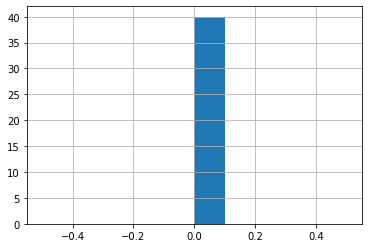

In [21]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count